<h1> MIDTERM HANDS ON EXAM - Chicago Crimes Data Analytics</h1>
<hr>
<h3>Analyst: John Oliver A. Liwanag</h3>

In [2]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')

In [3]:
chi_crimes = pd.read_csv('datasets\\Chicago_Crimes.csv')
chi_crimes

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,13439321,JH237424,04/14/2024 12:00:00 AM,040XX S PRAIRIE AVE,0890,THEFT,FROM BUILDING,APARTMENT,False,False,...,3,38.0,06,1178707.0,1878256.0,2024,12/21/2024 03:40:46 PM,41.821236,-87.619921,"(41.821236024, -87.619920712)"
1,13437420,JH234779,04/14/2024 12:00:00 AM,023XX W CERMAK RD,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,COMMERCIAL / BUSINESS OFFICE,False,False,...,25,31.0,26,1161210.0,1889347.0,2024,12/21/2024 03:40:46 PM,41.852052,-87.683801,"(41.852051675, -87.683800849)"
2,13428676,JH224478,04/14/2024 12:00:00 AM,043XX W LE MOYNE ST,0917,MOTOR VEHICLE THEFT,"CYCLE, SCOOTER, BIKE WITH VIN",STREET,False,False,...,36,23.0,07,1146960.0,1909501.0,2024,12/21/2024 03:40:46 PM,41.907640,-87.735587,"(41.907640473, -87.735587478)"
3,13429357,JH225293,04/14/2024 12:00:00 AM,039XX W ADAMS ST,143A,WEAPONS VIOLATION,UNLAWFUL POSSESSION - HANDGUN,STREET,True,False,...,28,26.0,15,1150158.0,1898721.0,2024,12/21/2024 03:40:46 PM,41.877997,-87.724121,"(41.877997275, -87.724120826)"
4,13430098,JH226395,04/14/2024 12:00:00 AM,011XX W 112TH PL,0890,THEFT,FROM BUILDING,RESIDENCE,False,False,...,21,75.0,06,1170856.0,1830157.0,2024,12/21/2024 03:40:46 PM,41.689421,-87.650123,"(41.6894214, -87.650123247)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249118,13805239,JJ217509,04/12/2025 12:00:00 AM,029XX W LOGAN BLVD,2826,OTHER OFFENSE,HARASSMENT BY ELECTRONIC MEANS,APARTMENT,False,False,...,1,22.0,26,1156478.0,1917149.0,2025,04/19/2025 03:41:24 PM,41.928440,-87.700416,"(41.928439867, -87.700415972)"
249119,13804023,JJ215813,04/12/2025 12:00:00 AM,094XX S HARVARD AVE,0430,BATTERY,AGGRAVATED - OTHER DANGEROUS WEAPON,STREET,False,False,...,9,49.0,04B,1175694.0,1842631.0,2025,04/19/2025 03:41:24 PM,41.723545,-87.632040,"(41.723545182, -87.632039508)"
249120,13803926,JJ215943,04/12/2025 12:00:00 AM,084XX S VINCENNES AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,21,71.0,08B,1173850.0,1848976.0,2025,04/19/2025 03:41:24 PM,41.740998,-87.638606,"(41.74099774, -87.638606337)"
249121,13803475,JJ215338,04/12/2025 12:00:00 AM,050XX S ABERDEEN ST,0530,ASSAULT,AGGRAVATED - OTHER DANGEROUS WEAPON,STREET,True,False,...,20,61.0,04A,1169838.0,1871348.0,2025,04/19/2025 03:41:24 PM,41.802477,-87.652657,"(41.802477219, -87.652657244)"


In [4]:
chi_crimes.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

<h1>Fill Null Values</h1>

In [6]:
chi_crimes.isnull().sum()

ID                        0
Case Number               0
Date                      0
Block                     0
IUCR                      0
Primary Type              0
Description               0
Location Description    857
Arrest                    0
Domestic                  0
Beat                      0
District                  0
Ward                      0
Community Area            3
FBI Code                  0
X Coordinate             90
Y Coordinate             90
Year                      0
Updated On                0
Latitude                 90
Longitude                90
Location                 90
dtype: int64

In [7]:
chi_crimes['Date'] = chi_crimes['Date'].astype(str)
chi_crimes['Date'] = chi_crimes['Date'].replace('/', '-') 
chi_crimes['Date'] = chi_crimes['Date'].str.strip()
chi_crimes['Date'] = pd.to_datetime(chi_crimes['Date'], dayfirst=True, errors='coerce')

In [8]:
chi_crimes['Location Description'] = chi_crimes['Location Description'].fillna('unaccounted')
chi_crimes['Community Area'] = chi_crimes['Community Area'].fillna('unaccounted')
chi_crimes['X Coordinate'] = chi_crimes['X Coordinate'].fillna('unaccounted')
chi_crimes['Y Coordinate'] = chi_crimes['Y Coordinate'].fillna('unaccounted')
chi_crimes['Latitude'] = chi_crimes['Latitude'].fillna(chi_crimes['Latitude'].mode()[0])
chi_crimes['Longitude'] = chi_crimes['Longitude'].fillna(chi_crimes['Latitude'].mode()[0])
chi_crimes['Location'] = chi_crimes['Location'].fillna('unaccounted')
chi_crimes.isnull().sum()

ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
dtype: int64

<h1>Extracting Date Information</h1>

In [10]:
chi_crimes['Date'] = pd.to_datetime(chi_crimes['Date'], dayfirst = True, errors = 'coerce')

In [11]:
chi_crimes['Month'] = chi_crimes['Date'].dt.month
chi_crimes['Day'] = chi_crimes['Date'].dt.day
chi_crimes['DayOfWeek'] = chi_crimes['Date'].dt.dayofweek
chi_crimes['Time'] = chi_crimes['Date'].dt.hour

chi_crimes

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Month,Day,DayOfWeek,Time
0,13439321,JH237424,2024-04-14,040XX S PRAIRIE AVE,0890,THEFT,FROM BUILDING,APARTMENT,False,False,...,1878256.0,2024,12/21/2024 03:40:46 PM,41.821236,-87.619921,"(41.821236024, -87.619920712)",4,14,6,0
1,13437420,JH234779,2024-04-14,023XX W CERMAK RD,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,COMMERCIAL / BUSINESS OFFICE,False,False,...,1889347.0,2024,12/21/2024 03:40:46 PM,41.852052,-87.683801,"(41.852051675, -87.683800849)",4,14,6,0
2,13428676,JH224478,2024-04-14,043XX W LE MOYNE ST,0917,MOTOR VEHICLE THEFT,"CYCLE, SCOOTER, BIKE WITH VIN",STREET,False,False,...,1909501.0,2024,12/21/2024 03:40:46 PM,41.907640,-87.735587,"(41.907640473, -87.735587478)",4,14,6,0
3,13429357,JH225293,2024-04-14,039XX W ADAMS ST,143A,WEAPONS VIOLATION,UNLAWFUL POSSESSION - HANDGUN,STREET,True,False,...,1898721.0,2024,12/21/2024 03:40:46 PM,41.877997,-87.724121,"(41.877997275, -87.724120826)",4,14,6,0
4,13430098,JH226395,2024-04-14,011XX W 112TH PL,0890,THEFT,FROM BUILDING,RESIDENCE,False,False,...,1830157.0,2024,12/21/2024 03:40:46 PM,41.689421,-87.650123,"(41.6894214, -87.650123247)",4,14,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249118,13805239,JJ217509,2025-12-04,029XX W LOGAN BLVD,2826,OTHER OFFENSE,HARASSMENT BY ELECTRONIC MEANS,APARTMENT,False,False,...,1917149.0,2025,04/19/2025 03:41:24 PM,41.928440,-87.700416,"(41.928439867, -87.700415972)",12,4,3,0
249119,13804023,JJ215813,2025-12-04,094XX S HARVARD AVE,0430,BATTERY,AGGRAVATED - OTHER DANGEROUS WEAPON,STREET,False,False,...,1842631.0,2025,04/19/2025 03:41:24 PM,41.723545,-87.632040,"(41.723545182, -87.632039508)",12,4,3,0
249120,13803926,JJ215943,2025-12-04,084XX S VINCENNES AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,1848976.0,2025,04/19/2025 03:41:24 PM,41.740998,-87.638606,"(41.74099774, -87.638606337)",12,4,3,0
249121,13803475,JJ215338,2025-12-04,050XX S ABERDEEN ST,0530,ASSAULT,AGGRAVATED - OTHER DANGEROUS WEAPON,STREET,True,False,...,1871348.0,2025,04/19/2025 03:41:24 PM,41.802477,-87.652657,"(41.802477219, -87.652657244)",12,4,3,0


<h1>Change Data Types</h1>

In [13]:
chi_crimes['Block'] = chi_crimes['Block'].astype('category')
chi_crimes['IUCR'] = chi_crimes['IUCR'].astype('category')
chi_crimes['Primary Type'] = chi_crimes['Primary Type'].astype('category')
chi_crimes['Description'] = chi_crimes['Description'].astype('category')
chi_crimes['Location Description'] = chi_crimes['Location Description'].astype('category')
chi_crimes['District'] = chi_crimes['District'].astype('category')
chi_crimes['Community Area'] = chi_crimes['Community Area'].astype('category')
chi_crimes['FBI Code'] = chi_crimes['FBI Code'].astype('category')

chi_crimes.dtypes

ID                               int64
Case Number                     object
Date                    datetime64[ns]
Block                         category
IUCR                          category
Primary Type                  category
Description                   category
Location Description          category
Arrest                            bool
Domestic                          bool
Beat                             int64
District                      category
Ward                             int64
Community Area                category
FBI Code                      category
X Coordinate                    object
Y Coordinate                    object
Year                             int64
Updated On                      object
Latitude                       float64
Longitude                      float64
Location                        object
Month                            int32
Day                              int32
DayOfWeek                        int32
Time                     

<hr>
<h1>Questions:</h1>
<h2>1. How many crimes are recorded for each year?</h2>

In [15]:
per_year = chi_crimes['Year'].value_counts()
per_year

Year
2024    188918
2025     60205
Name: count, dtype: int64

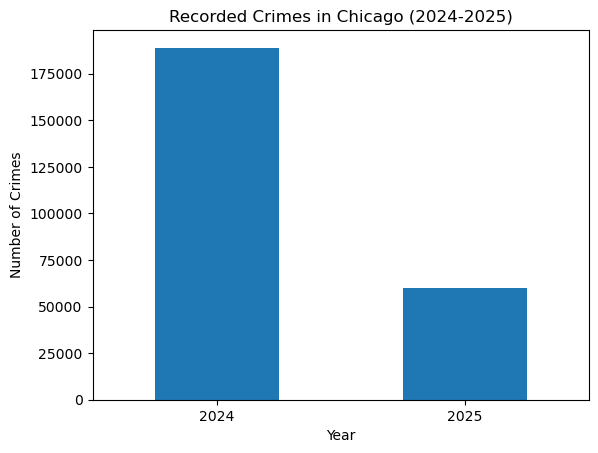

In [16]:
per_year.plot(kind='bar')
plt.title('Recorded Crimes in Chicago (2024-2025)')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=0)
plt.show()

<h1>INSIGHTS:</h1>
<ol style='font-size: 16px'>
    <li>There are 188,918 crimes recorded in 2024 and 60,205 in 2025 with a total of 249,123 records across all the data.</li>
    <li>There is a big gap between the first and second years, as the number of records experiences a 68.14% drop from 2024 to 2025.</li>
</ol>
<hr>
<h2>2. Which year have the higher arrest rate?</h2>

In [18]:
arrest_rate = chi_crimes.groupby(['Year', 'Arrest']).size()
arrest_rate

Year  Arrest
2024  False     163501
      True       25417
2025  False      49620
      True       10585
dtype: int64

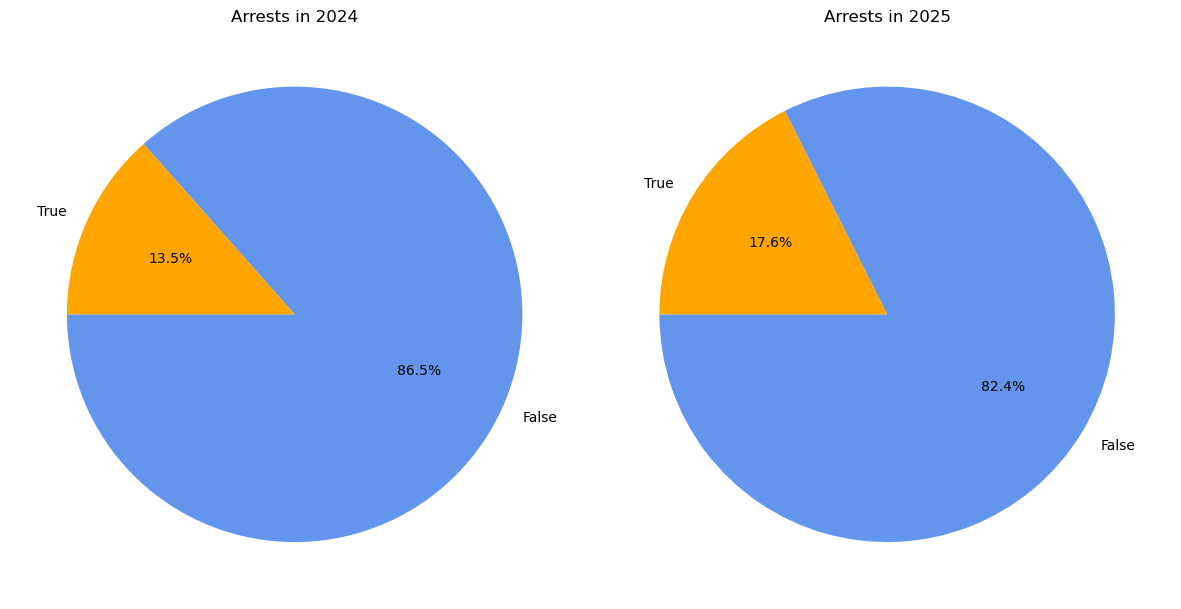

In [19]:
arrest_2024 = chi_crimes[chi_crimes['Year'] == 2024]
arrest_2025 = chi_crimes[chi_crimes['Year'] == 2025]

plt.figure(figsize=(12,6))

#for the year 2024
plt.subplot(1,2,1)
arrest_2024['Arrest'].value_counts().plot(
    kind='pie', 
    autopct='%1.1f%%', 
    colors=['cornflowerblue', 'orange'], 
    startangle = 180)
plt.title('Arrests in 2024')
plt.ylabel('')

#for the year 2025
plt.subplot(1,2,2)
arrest_2025['Arrest'].value_counts().plot(
    kind='pie', 
    autopct='%1.1f%%', 
    colors=['cornflowerblue', 'orange'], 
    startangle = -180)
plt.title('Arrests in 2025')
plt.ylabel('')

plt.tight_layout()
plt.show()

<h1>INSIGHTS:</h1>
<ol start='3', style='font-size: 16px'>
    <li>2025 has the higher arrest rate, being 4.1% more than the previous year.</li>
    <li>For both years, most crimes usually don't result in an arrest, as the remaining is still over 80% for both of them.</li>
</ol>
<hr>
<h2>3. What are the most common types of crime?</h2>

In [21]:
crimes = chi_crimes['Primary Type'].value_counts().head(6)
crimes

Primary Type
THEFT                  59201
BATTERY                44579
CRIMINAL DAMAGE        27094
ASSAULT                22615
MOTOR VEHICLE THEFT    19604
OTHER OFFENSE          16781
Name: count, dtype: int64

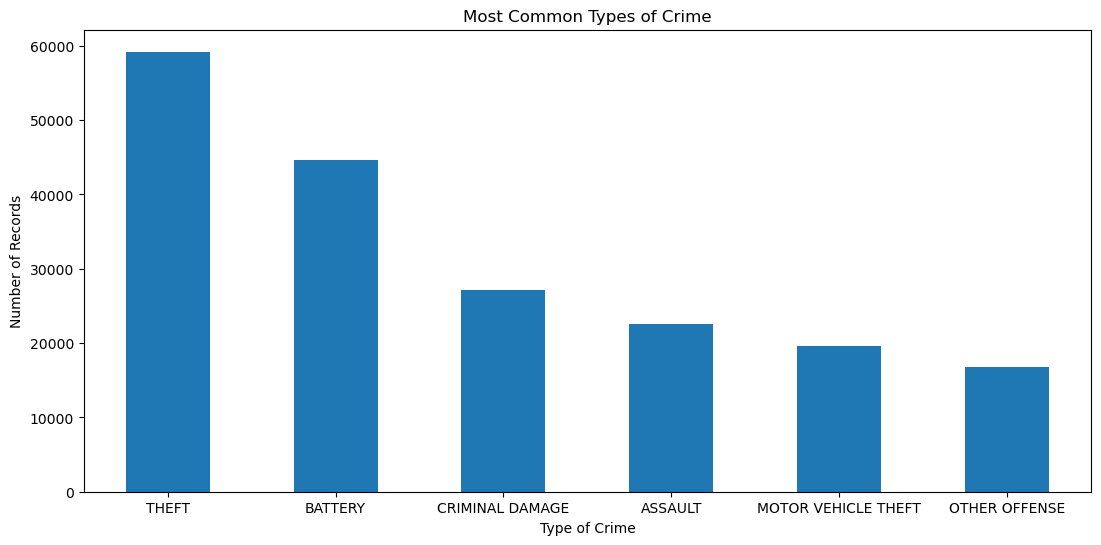

In [22]:
crimes.plot(kind='bar', figsize=(13, 6))
plt.title('Most Common Types of Crime')
plt.xlabel('Type of Crime')
plt.ylabel('Number of Records')
plt.xticks(rotation=0)
plt.show()

<h1>INSIGHTS:</h1>
<ol start='5', style='font-size: 16px'>
    <li>The most common type of crimes in Chicago is Theft, Battery, Criminal Damage, Assault, Motor Vehicle Theft and Other Offense.</li>
    <li>Theft is the most common from all the types with 59,201 being recorded across all the data.</li>
    <li>Theft, including Motor Vehicle Theft already covers nearly 31.6% of all reported crimes, making it the most common type in the dataset.</li>
</ol>
<hr>
<h2>4. What are the common locations where crimes occur most?</h2>

In [24]:
common_loc = chi_crimes['Location Description'].value_counts().head(5)
common_loc

Location Description
STREET                66040
APARTMENT             47787
RESIDENCE             29776
SIDEWALK              13265
SMALL RETAIL STORE     9858
Name: count, dtype: int64

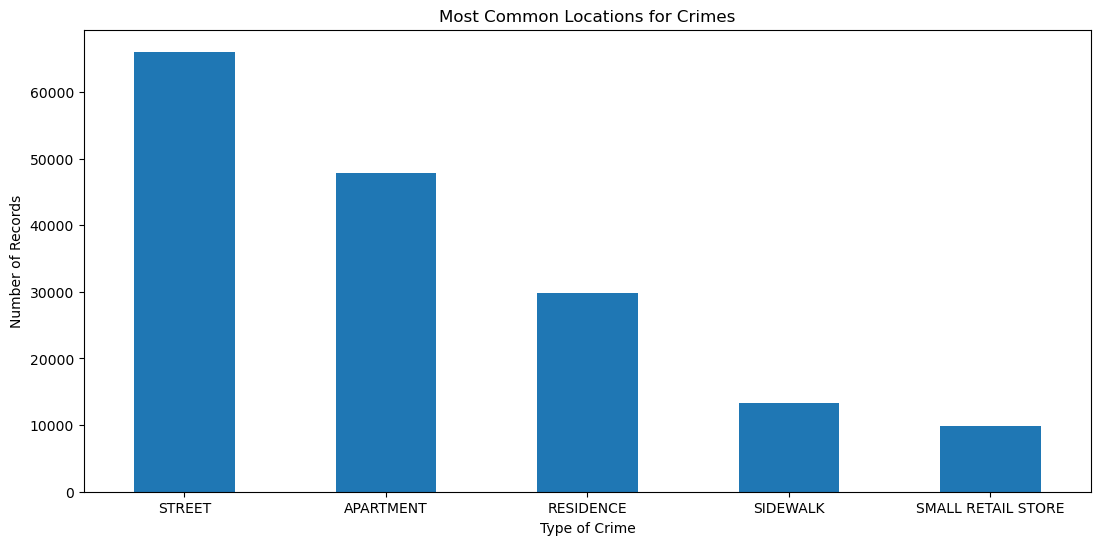

In [25]:
common_loc.plot(kind='bar', figsize=(13, 6))
plt.title('Most Common Locations for Crimes')
plt.xlabel('Type of Crime')
plt.ylabel('Number of Records')
plt.xticks(rotation=0)
plt.show()

<h1>INSIGHTS:</h1>
<ol start='8', style='font-size: 16px'>
    <li>The most common locations for crimes in Chicago is in the Street, Apartment, Residence, Sidewalk and Small Retail Stores.</li>
    <li>Crimes usually happen on the street as there have been 66,040 recorded for the past two years.</li>
    <li>Public spaces like streets and sidewalks are common as they're open and accessible, making them easier targets for crimes like theft or robbery.</li>
</ol>
<hr>
<h2>5. In what hour of the day does most crimes usually happen?</h2>

In [27]:
hour = chi_crimes.groupby(['Time']).size()
hour

Time
0     16752
1      8420
2      7504
3      6477
4      5227
5      4551
6      4744
7      6368
8      8576
9     10171
10    10543
11    11023
12    14247
13    11268
14    11936
15    13511
16    13288
17    13566
18    13286
19    12902
20    12460
21    11534
22    10936
23     9833
dtype: int64

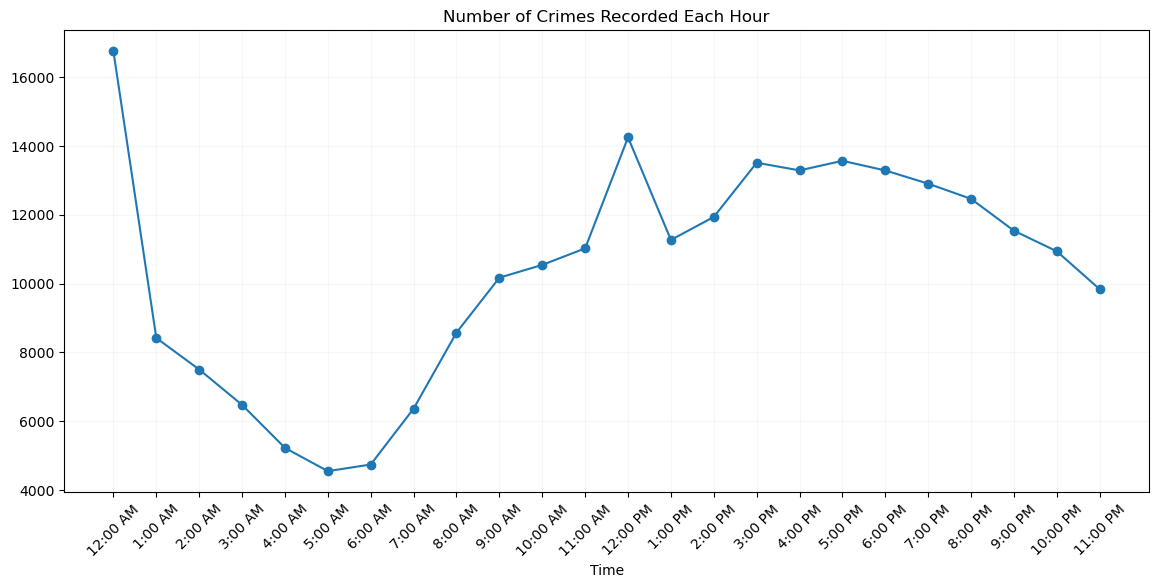

In [28]:
hour.plot(marker='o', figsize=(14, 6))
plt.title('Number of Crimes Recorded Each Hour')
plt.grid(alpha=0.1)
plt.xticks(range(0, 24), [
    '12:00 AM', '1:00 AM', '2:00 AM', '3:00 AM', '4:00 AM', '5:00 AM',
    '6:00 AM', '7:00 AM', '8:00 AM', '9:00 AM', '10:00 AM', '11:00 AM',
    '12:00 PM', '1:00 PM', '2:00 PM', '3:00 PM', '4:00 PM', '5:00 PM',
    '6:00 PM', '7:00 PM', '8:00 PM', '9:00 PM', '10:00 PM', '11:00 PM'
], rotation=45)
plt.show()

<h1>INSIGHTS:</h1>
<ol start='11', style='font-size: 16px'>
    <li>Most of the crimes happen at nighttime, as the count doesn't even go above 12,000 before 12:00PM (noon).</li>
    <li>12:00 AM (midnight) have the highest recorded crimes having 16,752 recorded that hour.</li>
    <li>5:00 is the hour with the least amount of records with only 4,551 being recorded in that hour for the past two years.</li>
</ol>
<hr>
<h2>6. Do robberies become more common in certain months in the year?</h2>

In [30]:
rob = chi_crimes[chi_crimes['Primary Type'] == 'ROBBERY']

rob_df = rob.groupby(['Year', 'Month']).size().unstack(level=0)
rob_df

Year,2024,2025
Month,,
1,249,374
2,205,294
3,239,357
4,638,68
5,648,63
6,670,60
7,807,48
8,632,66
9,709,63


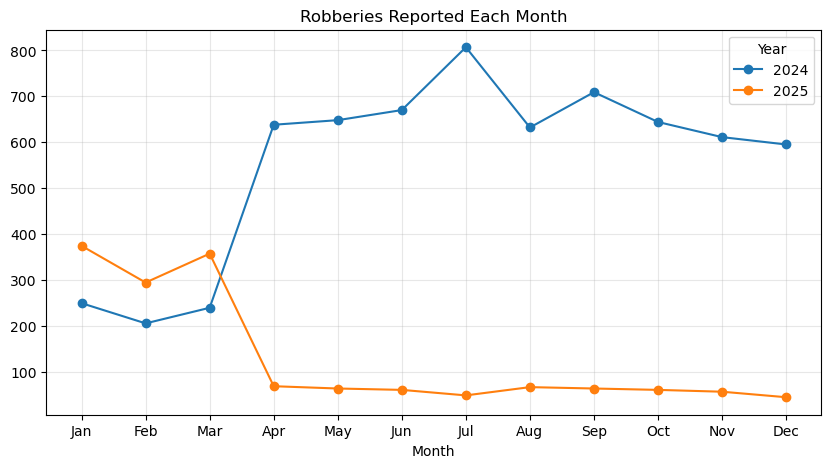

In [31]:
rob_df.plot(
    marker='o', 
    figsize=(10, 5),
    title='Robberies Reported Each Month'
)
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.grid(alpha=0.3)
plt.show()

<h1>INSIGHTS:</h1>
<ol start='14', style='font-size: 16px'>
    <li>In 2024, robberies experience a 26.5% increase in the month of April and they just continue to rise over the months.</li>
    <li>In 2025, the amount of it experience a 35.3% drop going from 357 from the month of March and down to only 68 in April.</li>
    <li>For both years, despite being different as one increases and one decreases they both experience this big change after the month of March.</li>
</ol>
<hr>
<h2>7. What type of crimes have the least amount of records and are most of them arrested?</h2>

In [33]:
arrest_type = chi_crimes.groupby(['Primary Type', 'Arrest']).size().unstack()
arrest_type

Arrest,False,True
Primary Type,,
ARSON,427,25
ASSAULT,20115,2500
BATTERY,36932,7647
BURGLARY,8027,416
CONCEALED CARRY LICENSE VIOLATION,3,246
CRIMINAL DAMAGE,25987,1107
CRIMINAL SEXUAL ASSAULT,1533,40
CRIMINAL TRESPASS,3569,1476
DECEPTIVE PRACTICE,14545,446


In [34]:
low_arrest = chi_crimes[chi_crimes['Primary Type'].isin(['GAMBLING', 'HUMAN TRAFFICKING', 'NON-CRIMINAL', 'OBSCENITY', 'PUBLIC INDECENCY'])]
low_arrest['Primary Type'] = low_arrest['Primary Type'].astype('string')

arrest_type = low_arrest.groupby(['Primary Type', 'Arrest']).size().unstack()

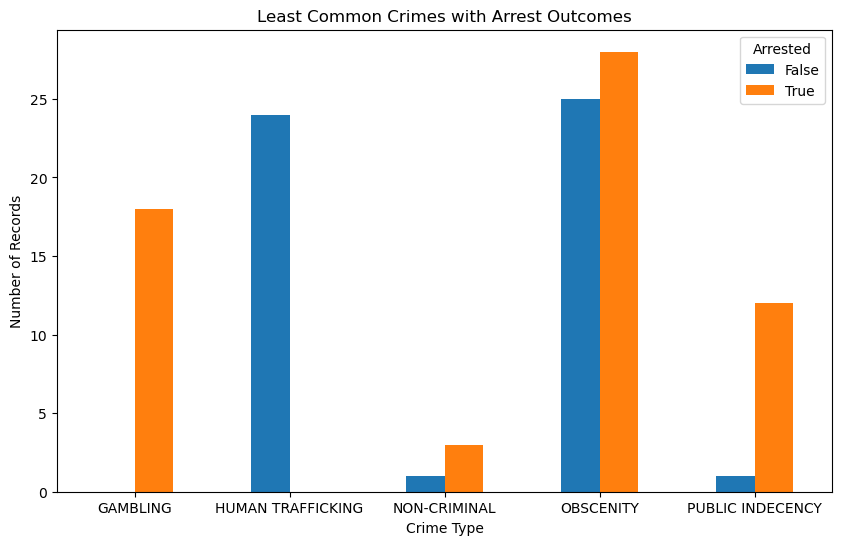

In [35]:
arrest_type.plot(kind='bar', figsize=(10,6))
plt.title('Least Common Crimes with Arrest Outcomes')
plt.xlabel('Crime Type')
plt.ylabel('Number of Records')
plt.legend(title='Arrested')
plt.xticks(rotation=0)
plt.show()

<h1>INSIGHTS:</h1>
<ol start='17', style='font-size: 16px'>
    <li>The crimes with the least amount of records are Gambling, Human Trafficking, Non-Criminal, Obscenity and Public Indecency.</li>
    <li>Non-Criminal have the least records for all of the types with a combined count of only 4.</li>
    <li>For Gambling, it has a 100% arrest rate with 18 records which all of them resulted in an arrest.</li>
    <li>It is then the opposite for Human Trafficking being 0% making it with no arrests despite having 24 records.</li>
</ol>
<hr>
<h2>8. Are the crimes in the most common locations domestic or non-domestic?</h2>

In [37]:
dom_loc = chi_crimes[chi_crimes['Location Description'].isin(['STREET', 'APARTMENT', 'RESIDENCE', 'SIDEWALK', 'SMALL RETAIL STORE'])]
dom_loc['Location Description'] = dom_loc['Location Description'].astype('string')

arresto_d = dom_loc.groupby(['Location Description', 'Domestic']).size().unstack()
arresto_d

Domestic,False,True
Location Description,,
APARTMENT,25417,22370
RESIDENCE,17501,12275
SIDEWALK,11653,1612
SMALL RETAIL STORE,9772,86
STREET,60878,5162


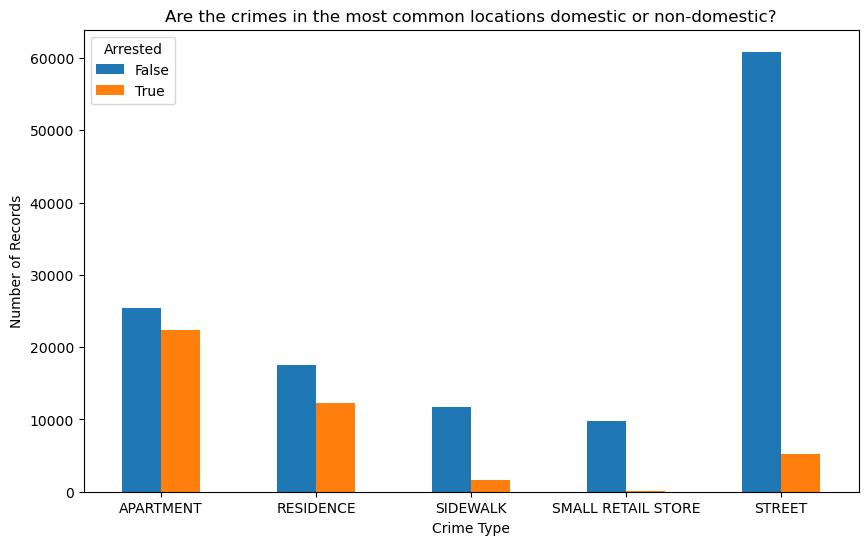

In [38]:
arresto_d.plot(kind='bar', figsize=(10,6))
plt.title('Are the crimes in the most common locations domestic or non-domestic?')
plt.xlabel('Crime Type')
plt.ylabel('Number of Records')
plt.legend(title='Arrested')
plt.xticks(rotation=0)
plt.show()

<h1>INSIGHTS:</h1>
<ol start='21', style='font-size: 16px'>
    <li>Most of the crimes happening in the locations are non-domestic.</li>
    <li>Apartments experience the most domestic crimes, having 22,370 recorded having the least difference from their non-domestic crimes in the area.</li>
    <li>Apartments and Residence have the most domestic crimes as this is where people live, so it naturally occur in these settings.</li>
</ol>
<hr>
<h2>9. What are the most common descriptions for the crimes in Chicago?</h2>

In [40]:
common_desc = chi_crimes['Description'].value_counts().head(6)
common_desc

Description
SIMPLE                     30526
DOMESTIC BATTERY SIMPLE    19810
$500 AND UNDER             17963
OVER $500                  16572
TO VEHICLE                 14886
AUTOMOBILE                 14780
Name: count, dtype: int64

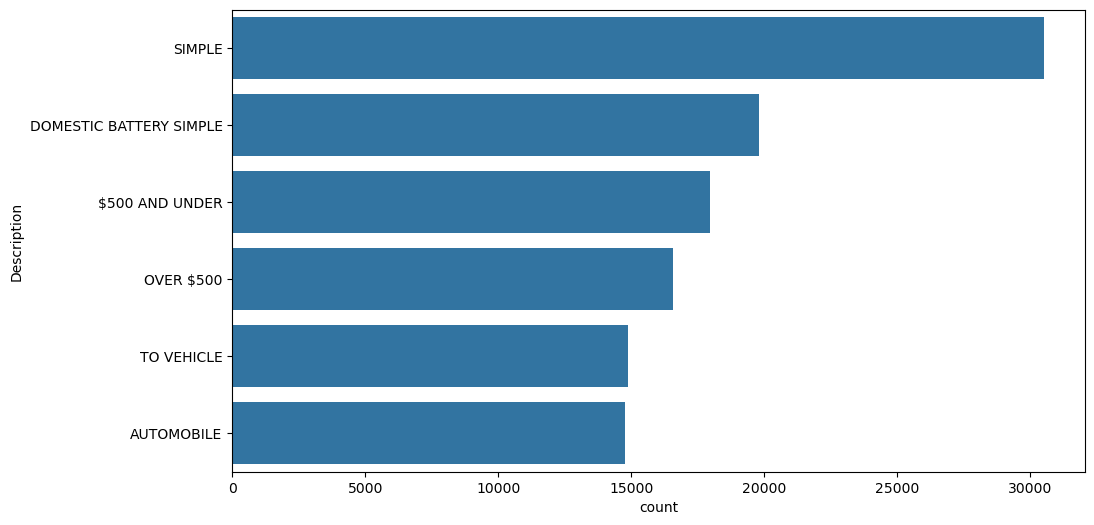

In [41]:
plt.figure(figsize=(11,6))
sns.countplot(y='Description', data=chi_crimes, order=common_desc.index)
plt.show()

<h1>INSIGHTS:</h1>
<ol start='24', style='font-size: 16px'>
    <li>'Simple' is the most common description for crimes with about 30,526 records given this description.</li>
    <li>This is followed by 'Domestic Battery Simple' with about 19,810 records.</li>
</ol>
<hr>
<h2>10. Is there any difference to the number of crimes for weekdays and weekends? </h2>

In [43]:
whichdays = chi_crimes.groupby(['DayOfWeek']).size()
whichdays

DayOfWeek
0    36262
1    35580
2    34429
3    35007
4    37498
5    35666
6    34681
dtype: int64

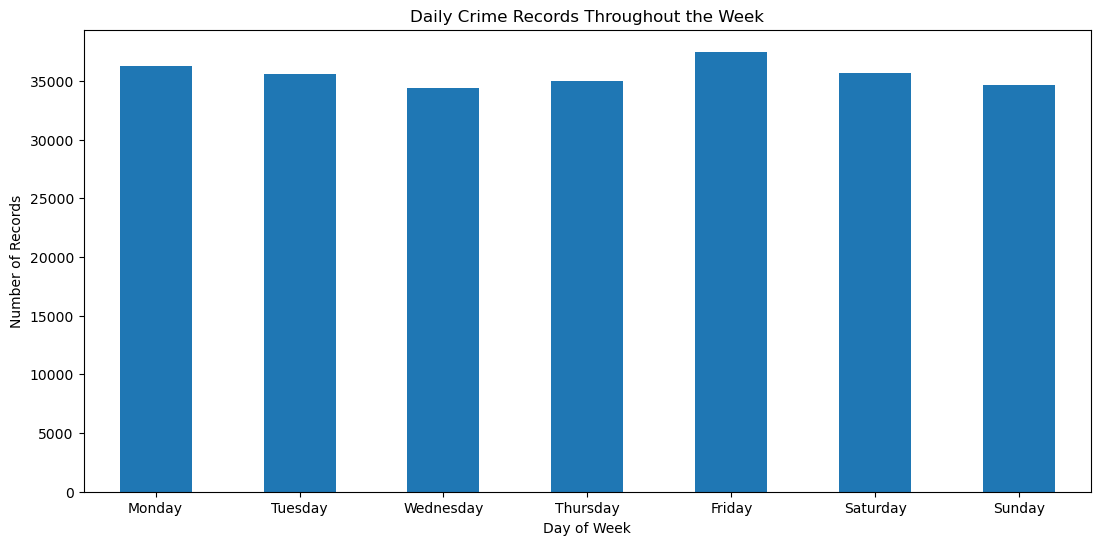

In [44]:
whichdays.plot(kind='bar', figsize=(13, 6))
plt.title('Daily Crime Records Throughout the Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Records')
plt.xticks(range(0, 7), ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], rotation=0)

plt.show()

<h1>INSIGHTS:</h1>
<ol start='26', style='font-size: 16px'>
    <li>There is not much difference between all of the days in the week, as all of them stay over 35,000.</li>
    <li>Throughout the week, Friday have the highest amount of records with about 37,498 crimes reported that day of week.</li>
    <li>This is followed by Monday with 36,262 records.</li>
</ol>
<hr>
<h2>11. Is there more domestic or non-domestic crimes? </h2>

In [46]:
domestic = chi_crimes.groupby(['Year', 'Domestic']).size()
domestic

Year  Domestic
2024  False       154145
      True         34773
2025  False        48631
      True         11574
dtype: int64

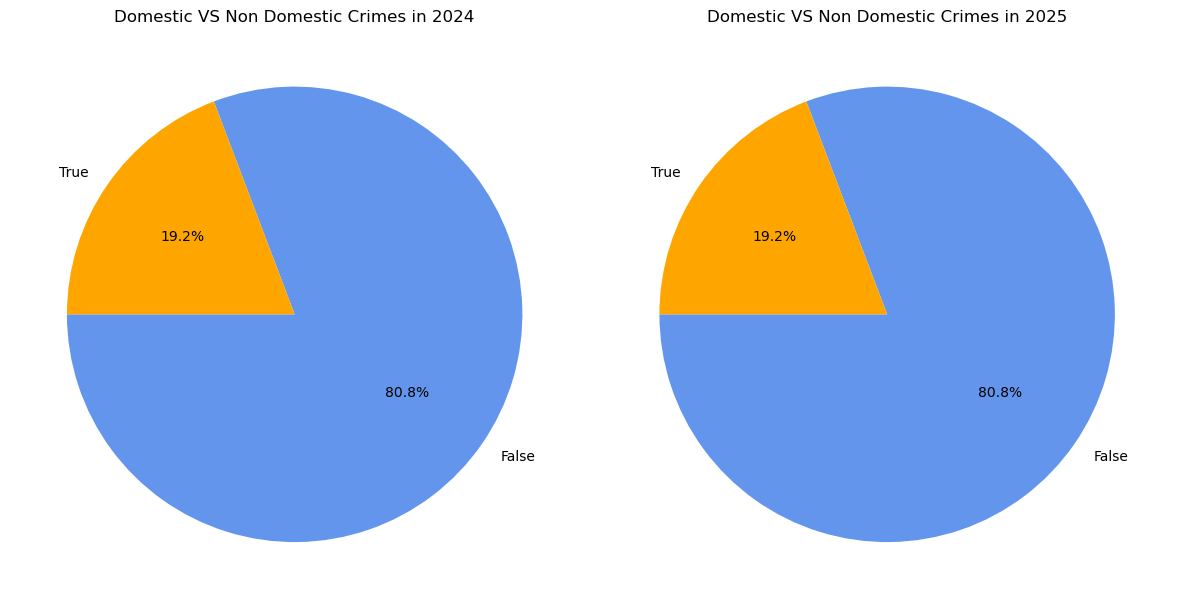

In [47]:
dom_2024 = chi_crimes[chi_crimes['Year'] == 2024]
dom_2024 = chi_crimes[chi_crimes['Year'] == 2025]

plt.figure(figsize=(12,6))

#for the year 2024
plt.subplot(1,2,1)
dom_2024['Domestic'].value_counts().plot(
    kind='pie', 
    autopct='%1.1f%%', 
    colors=['cornflowerblue', 'orange'], 
    startangle = 180)
plt.title('Domestic VS Non Domestic Crimes in 2024')
plt.ylabel('')

#for the year 2025
plt.subplot(1,2,2)
dom_2024['Domestic'].value_counts().plot(
    kind='pie', 
    autopct='%1.1f%%', 
    colors=['cornflowerblue', 'orange'], 
    startangle = -180)
plt.title('Domestic VS Non Domestic Crimes in 2025')
plt.ylabel('')

plt.tight_layout()
plt.show()

<h1>INSIGHTS:</h1>
<ol start='29', style='font-size: 16px'>
    <li>For both years, there are more non-domestic crimes than domestic as the remaining are still above 80% of all the records.</li>
    <li>2024 and 2025 are almost the same only having a 0.8% difference.</li>
    <li>Domestic actually experience an increase in percentage for the year 2025 despite that year having the least amount of crimes recorded.</li>
</ol>
<hr>
<h2>12. What FBI Code have the highest record from the data?</h2>

In [49]:
code = chi_crimes['FBI Code'].value_counts().head(10)
code

FBI Code
06     60380
08B    37090
14     27094
07     19604
08A    19009
26     18855
11     13534
03      8200
04B     7851
04A     7473
Name: count, dtype: int64

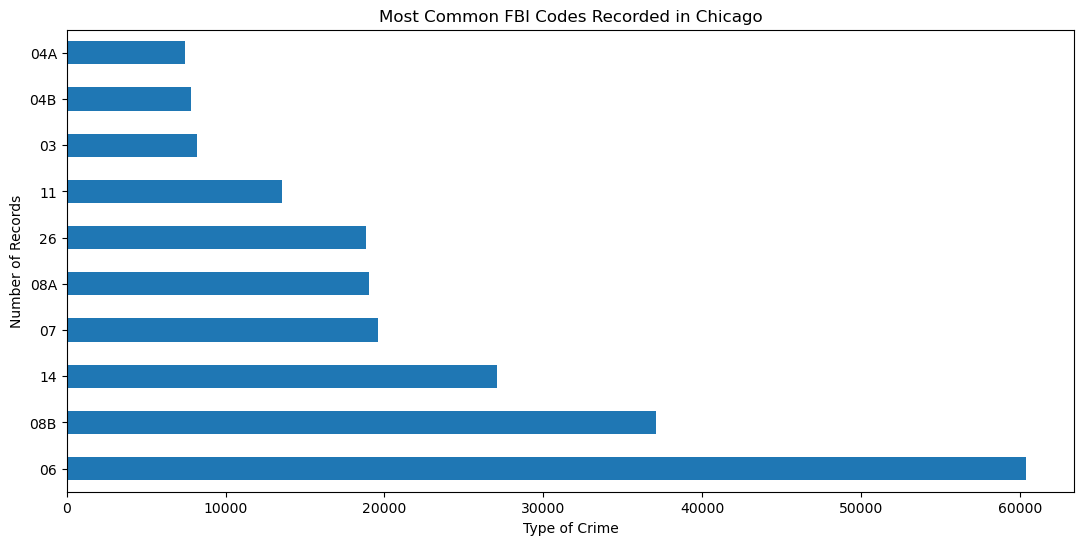

In [50]:
code.plot(kind='barh', figsize=(13, 6))
plt.title('Most Common FBI Codes Recorded in Chicago')
plt.xlabel('Type of Crime')
plt.ylabel('Number of Records')
plt.xticks(rotation=0)
plt.show()

<h1>INSIGHTS:</h1>
<ol start='32', style='font-size: 16px'>
    <li>'06' is the most common FBI Code with about 60,380 records that come with that code.</li>
    <li>This is followed by '08B' with about 37,090 records.</li>
</ol>
<hr>
<h2>13. Which crimes are most common in the most active blocks?</h2>

In [52]:
active_blocks = chi_crimes[chi_crimes['Block'].isin(['001XX N STATE ST', '0000X N STATE ST', '0000X W TERMINAL ST', '044XX N BROADWAY', '076XX S CICERO AVE', '011XX S CANAL ST'])]
active_blocks['Block'] = active_blocks['Block'].astype('string')

crime_count = active_blocks.groupby(['Block', 'Primary Type']).size().unstack(level=0)
crime_count

Block,0000X N STATE ST,0000X W TERMINAL ST,001XX N STATE ST,011XX S CANAL ST,044XX N BROADWAY,076XX S CICERO AVE
Primary Type,,,,,,
ARSON,1,0,0,1,0,0
ASSAULT,18,18,29,18,5,6
BATTERY,22,78,51,24,15,5
BURGLARY,1,1,2,2,1,2
CONCEALED CARRY LICENSE VIOLATION,0,52,2,0,0,0
CRIMINAL DAMAGE,4,13,17,6,1,23
CRIMINAL SEXUAL ASSAULT,1,0,1,0,0,1
CRIMINAL TRESPASS,12,28,31,4,11,1
DECEPTIVE PRACTICE,16,17,59,15,11,4


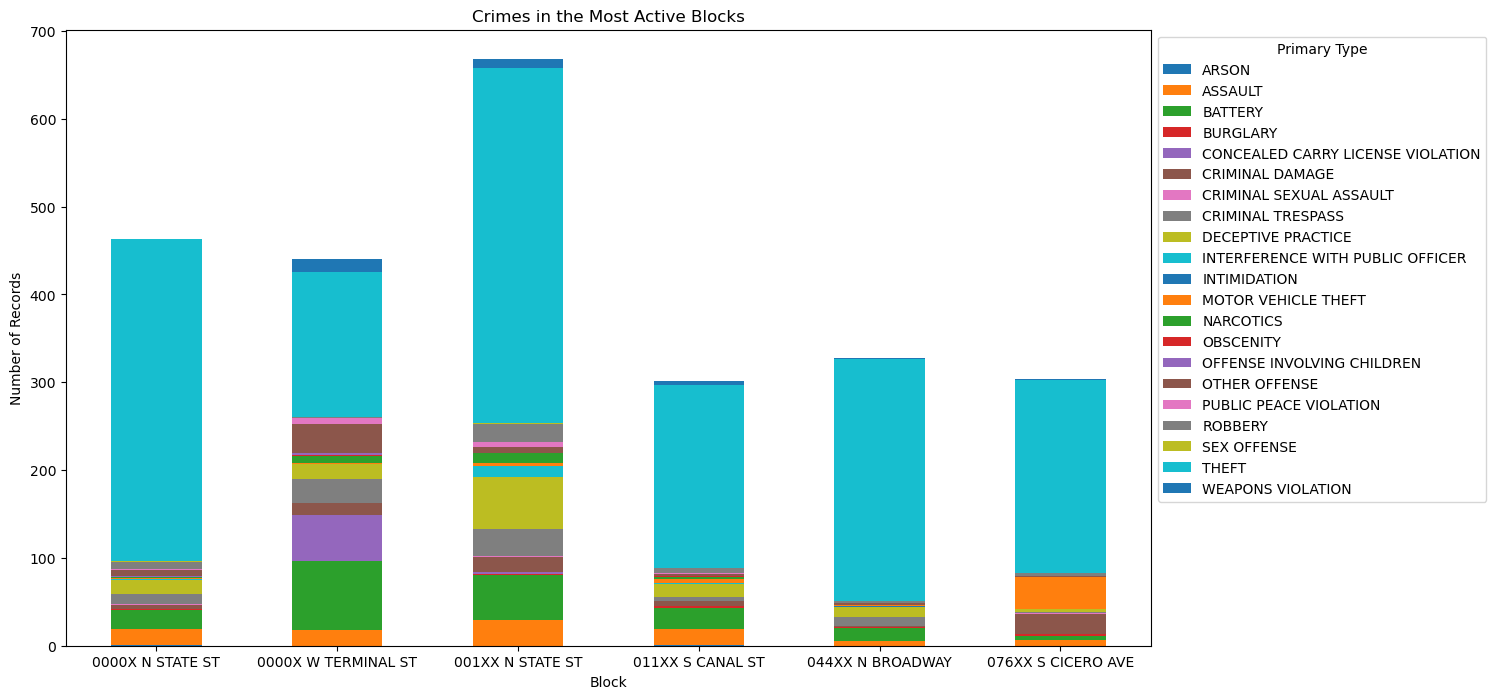

In [53]:
active_blocks['Primary Type'] = active_blocks['Primary Type'].astype('string')
active = active_blocks.groupby(['Block', 'Primary Type']).size().unstack()

active.plot(kind='bar', stacked=True, figsize=(14,8))
plt.title('Crimes in the Most Active Blocks')
plt.xlabel('Block')
plt.ylabel('Number of Records')
plt.legend(title='Arrested')
plt.xticks(rotation=0)
plt.legend(title='Primary Type', bbox_to_anchor = (1,1), loc='upper left')
plt.show()

<h1>INSIGHTS:</h1>
<ol start='34', style='font-size: 16px'>
    <li>All the blocks experience the same having theft as their most common crime recorded.</li>
    <li>001XX N STATE ST is the most active block having the highest record of theft and highest combined number with over 600 happening in that block alone.</li>
</ol>
<hr>